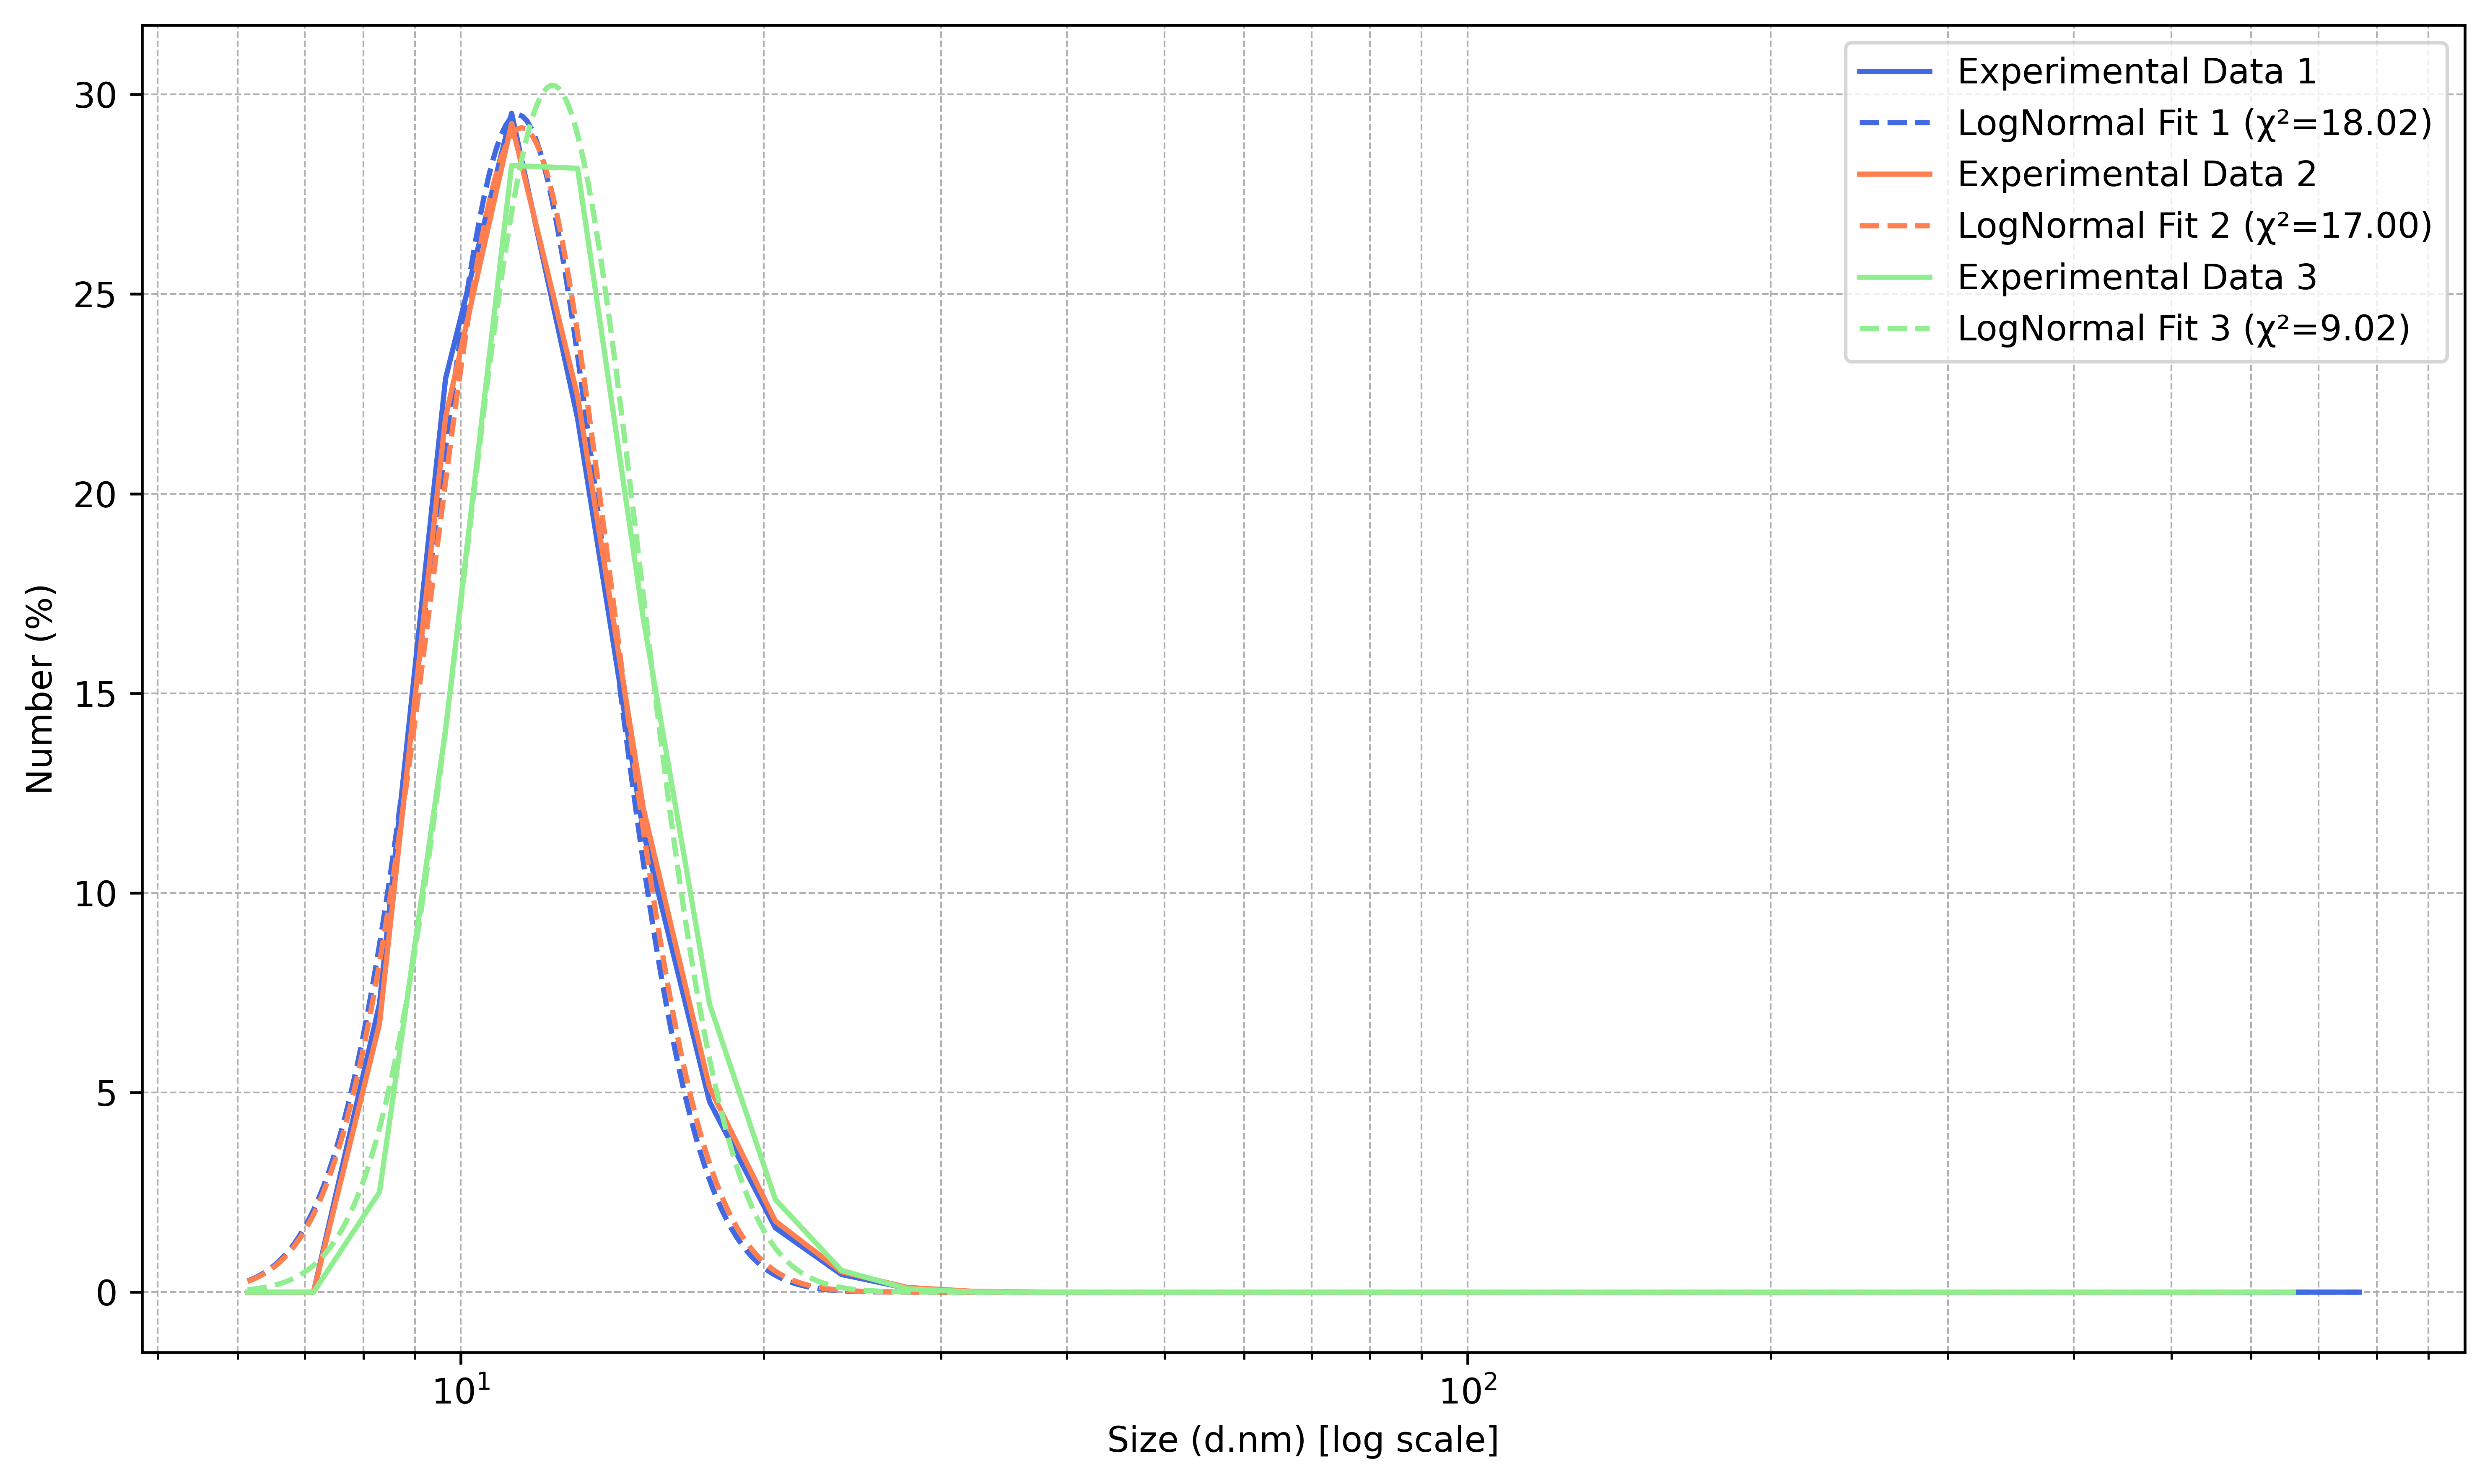


Fit Statistics Summary (Only % > 0.1 included):
Sample                       Mean (nm)     Std (nm)         Chi²
-----------------------------------------------------------------
Sample 1 Number.1                12.11         2.48        18.02
Sample 1 Number.2                12.24         2.53        17.00
Sample 1 Number.3                13.08         2.62         9.02


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

# Log-normal PDF
def lognormal(x, A, mu, sigma):
    return A * (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x) - mu)**2) / (2 * sigma**2))

# File and sheets
file_path = '/Users/ludovica/Documents/Bachelor/BA6/Physical Chemistry/Challenge B /DLS/Sample 1.xlsx'
sheet_names = ["Sample 1 Number.1", "Sample 1 Number.2", "Sample 1 Number.3"]

# Custom colors for data plots (must match or exceed number of sheets)
data_colors = ['royalblue', 'coral', 'lightgreen']  # Change as you like

# Custom legend labels for data and fit lines (must match sheet_names length)
data_labels = [
    "Experimental Data 1",
    "Experimental Data 2",
    "Experimental Data 3"
]

fit_labels = [
    "LogNormal Fit 1",
    "LogNormal Fit 2",
    "LogNormal Fit 3"
]

# Setup plot
fig, ax = plt.subplots(figsize=(10, 6),dpi=600)
stats_data = []

for i, sheet in enumerate(sheet_names):
    df = pd.read_excel(file_path, sheet_name=sheet, dtype=str)
    df.columns = ['Size_nm', 'Percent']
    df['Size_nm'] = df['Size_nm'].str.replace(',', '.', regex=False)
    df['Percent'] = df['Percent'].str.replace(',', '.', regex=False)
    df['Size_nm'] = pd.to_numeric(df['Size_nm'], errors='coerce')
    df['Percent'] = pd.to_numeric(df['Percent'], errors='coerce')
    df = df.dropna()

    x = df['Size_nm'].values
    y = df['Percent'].values


    # Initial guess
    A_init = max(y)
    mu_init = np.log(np.mean(x))
    sigma_init = np.std(np.log(x))
    p0 = [A_init, mu_init, sigma_init]

    try:
        popt, pcov = curve_fit(lognormal, x, y, p0=p0, maxfev=10000)
        A_fit, mu_fit, sigma_fit = popt
        y_fit = lognormal(x, *popt)
        chi2 = np.sum((y - y_fit) ** 2)
        mean = np.exp(mu_fit + (sigma_fit**2)/2)
        std = np.sqrt((np.exp(sigma_fit**2) - 1) * np.exp(2*mu_fit + sigma_fit**2))

        color = data_colors[i % len(data_colors)]

        # Plot data with custom label (solid)
        ax.plot(x, y, '-', label=data_labels[i], color=color)

        # Plot fit with custom label + chi2 (dashed)
        x_fit = np.logspace(np.log10(min(x)), np.log10(max(x)), 500)
        y_fit_smooth = lognormal(x_fit, *popt)
        ax.plot(x_fit, y_fit_smooth, '--', label=f"{fit_labels[i]} (χ²={chi2:.2f})", color=color)

        # Save stats
        stats_data.append([sheet, f"{mean:.2f}", f"{std:.2f}", f"{chi2:.2f}"])
    except Exception as e:
        print(f"Fit failed for {sheet}: {e}")

# Finalize plot
ax.set_xscale('log')
ax.set_xlabel('Size (d.nm) [log scale]')
ax.set_ylabel('Number (%)')
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
save_path = os.path.join("/Users/ludovica/Documents/Bachelor/BA6/Physical Chemistry/Challenge B /DLS", "Number 1.png")
plt.savefig(save_path, format='png', bbox_inches='tight')
plt.show()

# Print stats table
print("\nFit Statistics Summary (Only % > 0.1 included):")
print(f"{'Sample':<25} {'Mean (nm)':>12} {'Std (nm)':>12} {'Chi²':>12}")
print("-" * 65)
for row in stats_data:
    print(f"{row[0]:<25} {row[1]:>12} {row[2]:>12} {row[3]:>12}")


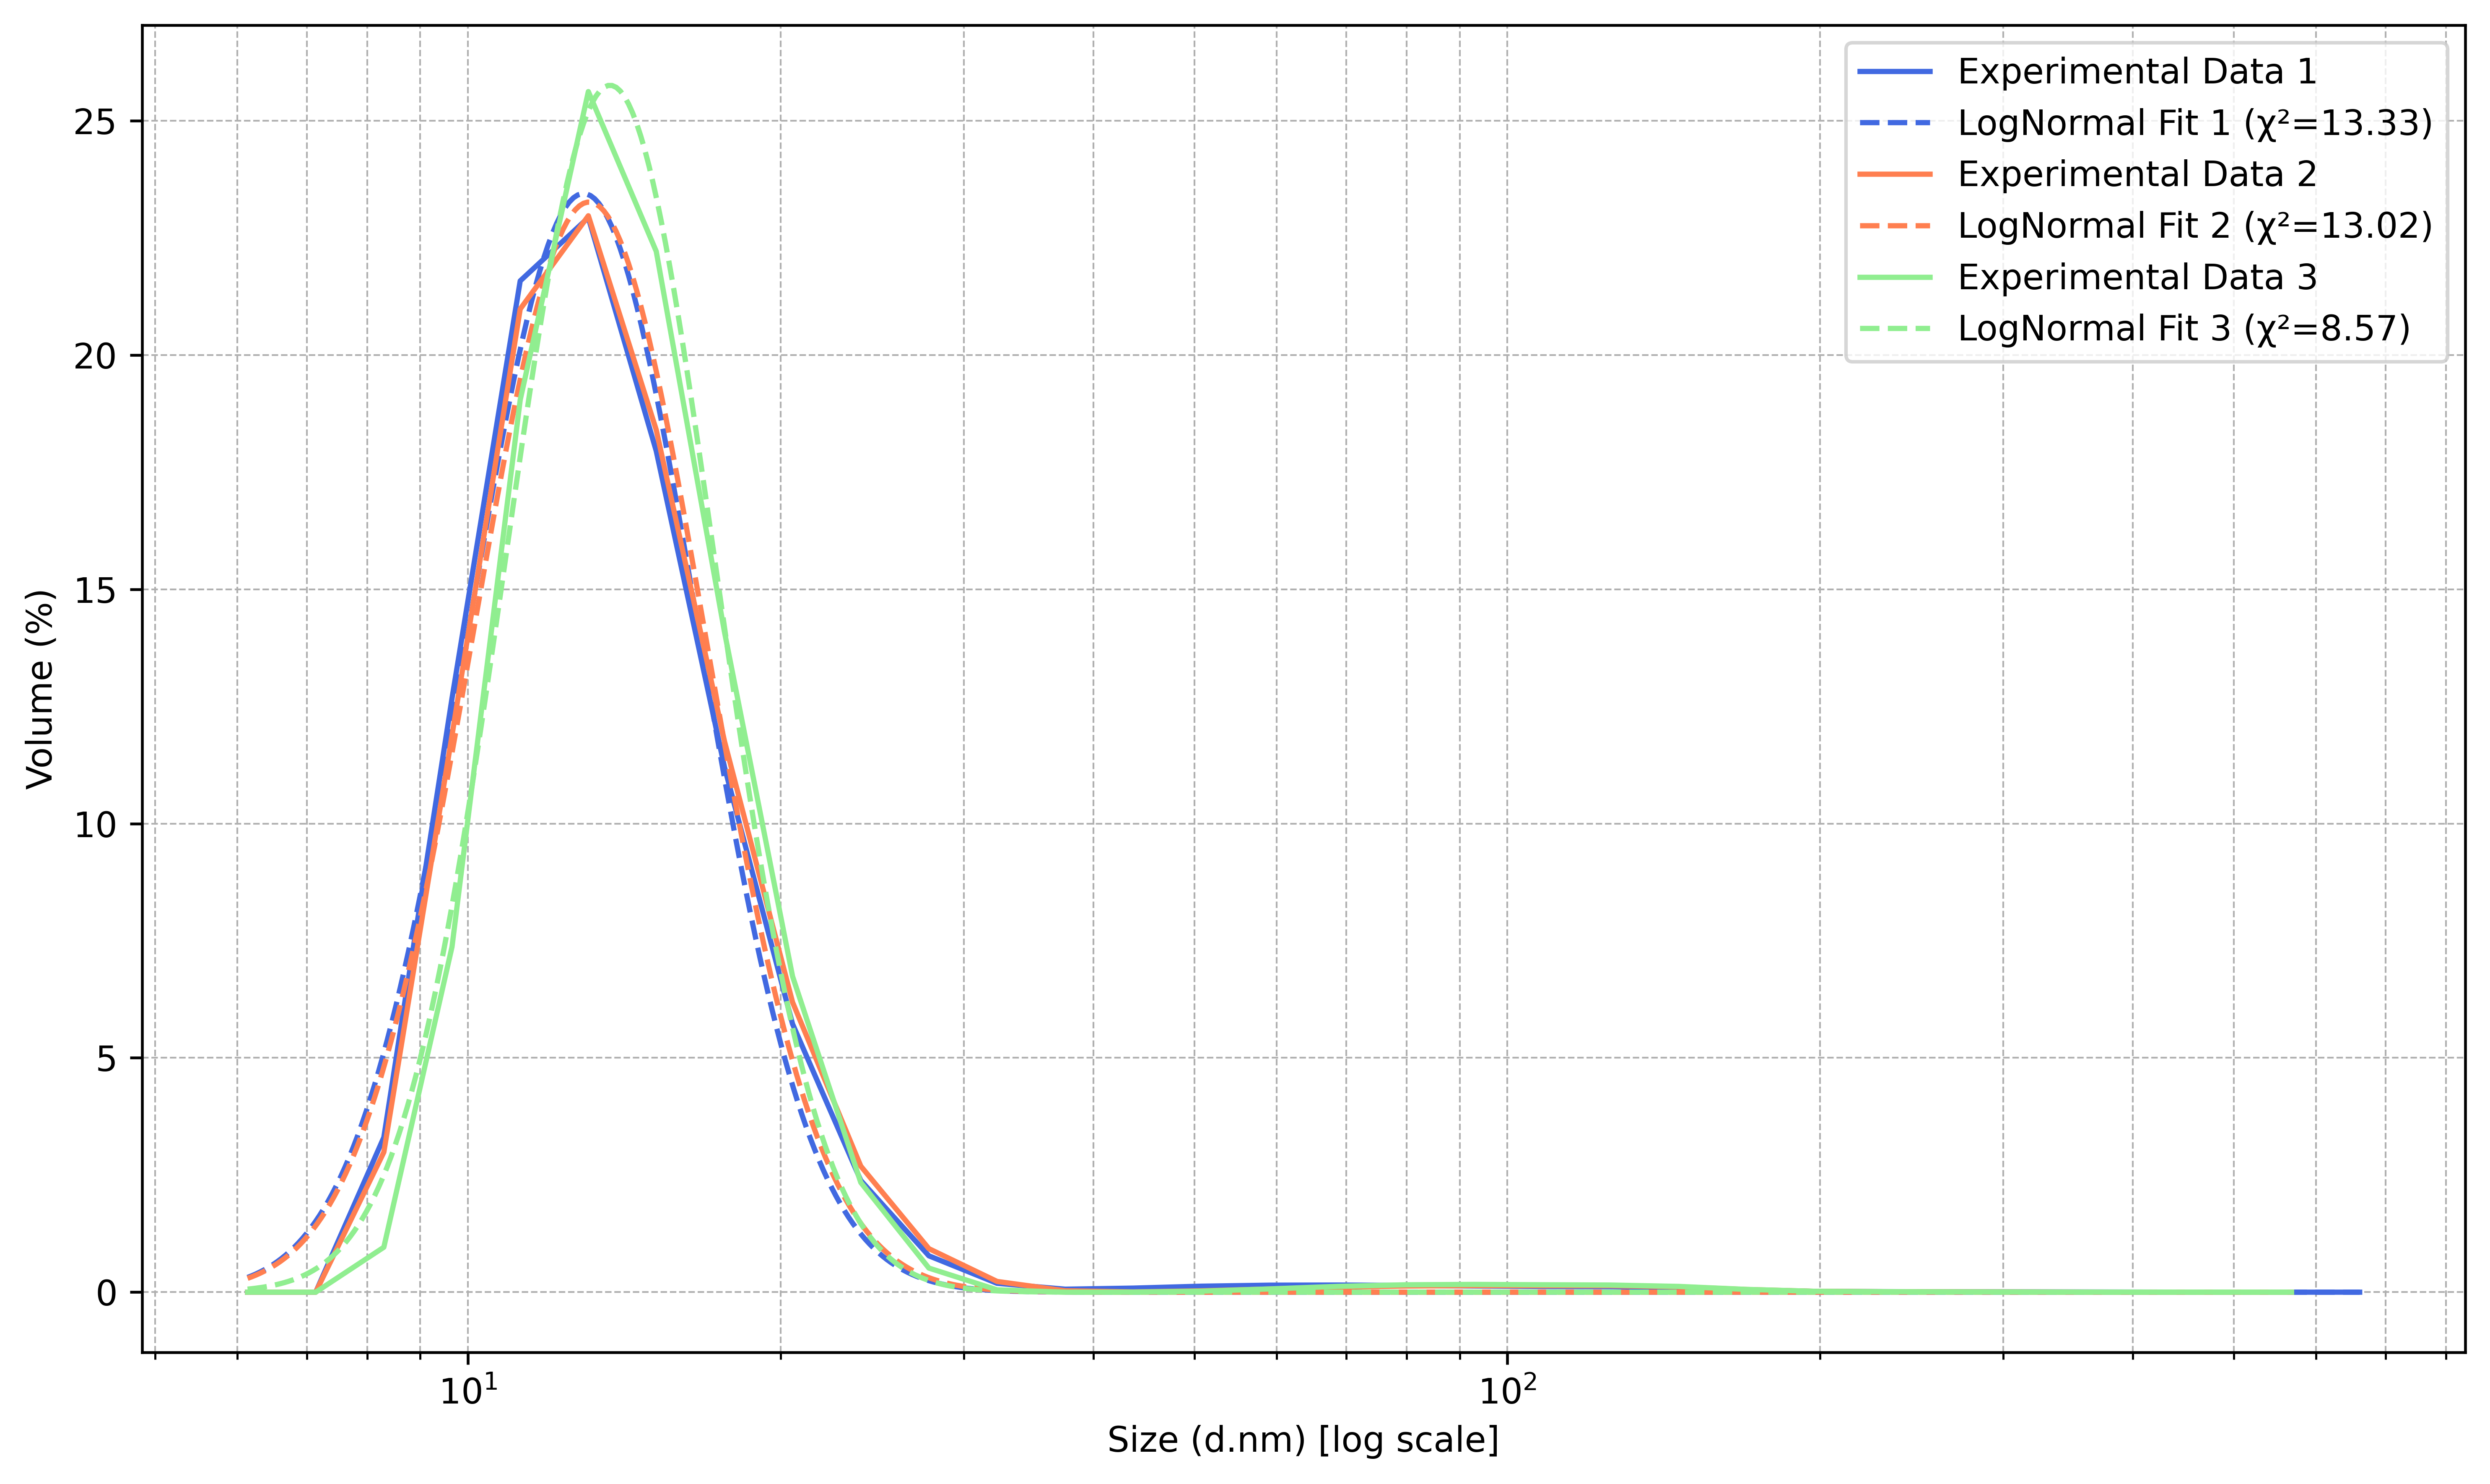


Fit Statistics Summary (Only % > 0.1 included):
Sample                       Mean (nm)     Std (nm)         Chi²
-----------------------------------------------------------------
Sample 1 Volume.1                14.23         3.66        13.33
Sample 1 Volume.2                14.43         3.76        13.02
Sample 1 Volume.3                14.86         3.49         8.57


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

# Log-normal PDF
def lognormal(x, A, mu, sigma):
    return A * (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x) - mu)**2) / (2 * sigma**2))

# File and sheets
file_path = '/Users/ludovica/Documents/Bachelor/BA6/Physical Chemistry/Challenge B /DLS/Sample 1.xlsx'
sheet_names = ["Sample 1 Volume.1", "Sample 1 Volume.2", "Sample 1 Volume.3"]

# Custom colors for data plots (must match or exceed number of sheets)
data_colors = ['royalblue', 'coral', 'lightgreen']  # Change as you like

# Custom legend labels for data and fit lines (must match sheet_names length)
data_labels = [
    "Experimental Data 1",
    "Experimental Data 2",
    "Experimental Data 3"
]

fit_labels = [
    "LogNormal Fit 1",
    "LogNormal Fit 2",
    "LogNormal Fit 3"
]

# Setup plot
fig, ax = plt.subplots(figsize=(10, 6),dpi=600)
stats_data = []

for i, sheet in enumerate(sheet_names):
    df = pd.read_excel(file_path, sheet_name=sheet, dtype=str)
    df.columns = ['Size_nm', 'Percent']
    df['Size_nm'] = df['Size_nm'].str.replace(',', '.', regex=False)
    df['Percent'] = df['Percent'].str.replace(',', '.', regex=False)
    df['Size_nm'] = pd.to_numeric(df['Size_nm'], errors='coerce')
    df['Percent'] = pd.to_numeric(df['Percent'], errors='coerce')
    df = df.dropna()

    x = df['Size_nm'].values
    y = df['Percent'].values


    # Initial guess
    A_init = max(y)
    mu_init = np.log(np.mean(x))
    sigma_init = np.std(np.log(x))
    p0 = [A_init, mu_init, sigma_init]

    try:
        popt, pcov = curve_fit(lognormal, x, y, p0=p0, maxfev=10000)
        A_fit, mu_fit, sigma_fit = popt
        y_fit = lognormal(x, *popt)
        chi2 = np.sum((y - y_fit) ** 2)
        mean = np.exp(mu_fit + (sigma_fit**2)/2)
        std = np.sqrt((np.exp(sigma_fit**2) - 1) * np.exp(2*mu_fit + sigma_fit**2))

        color = data_colors[i % len(data_colors)]

        # Plot data with custom label (solid)
        ax.plot(x, y, '-', label=data_labels[i], color=color)

        # Plot fit with custom label + chi2 (dashed)
        x_fit = np.logspace(np.log10(min(x)), np.log10(max(x)), 500)
        y_fit_smooth = lognormal(x_fit, *popt)
        ax.plot(x_fit, y_fit_smooth, '--', label=f"{fit_labels[i]} (χ²={chi2:.2f})", color=color)

        # Save stats
        stats_data.append([sheet, f"{mean:.2f}", f"{std:.2f}", f"{chi2:.2f}"])
    except Exception as e:
        print(f"Fit failed for {sheet}: {e}")

# Finalize plot
ax.set_xscale('log')
ax.set_xlabel('Size (d.nm) [log scale]')
ax.set_ylabel('Volume (%)')
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
save_path = os.path.join("/Users/ludovica/Documents/Bachelor/BA6/Physical Chemistry/Challenge B /DLS", "Volume 1.png")
plt.savefig(save_path, format='png', bbox_inches='tight')
plt.show()

# Print stats table
print("\nFit Statistics Summary (Only % > 0.1 included):")
print(f"{'Sample':<25} {'Mean (nm)':>12} {'Std (nm)':>12} {'Chi²':>12}")
print("-" * 65)
for row in stats_data:
    print(f"{row[0]:<25} {row[1]:>12} {row[2]:>12} {row[3]:>12}")


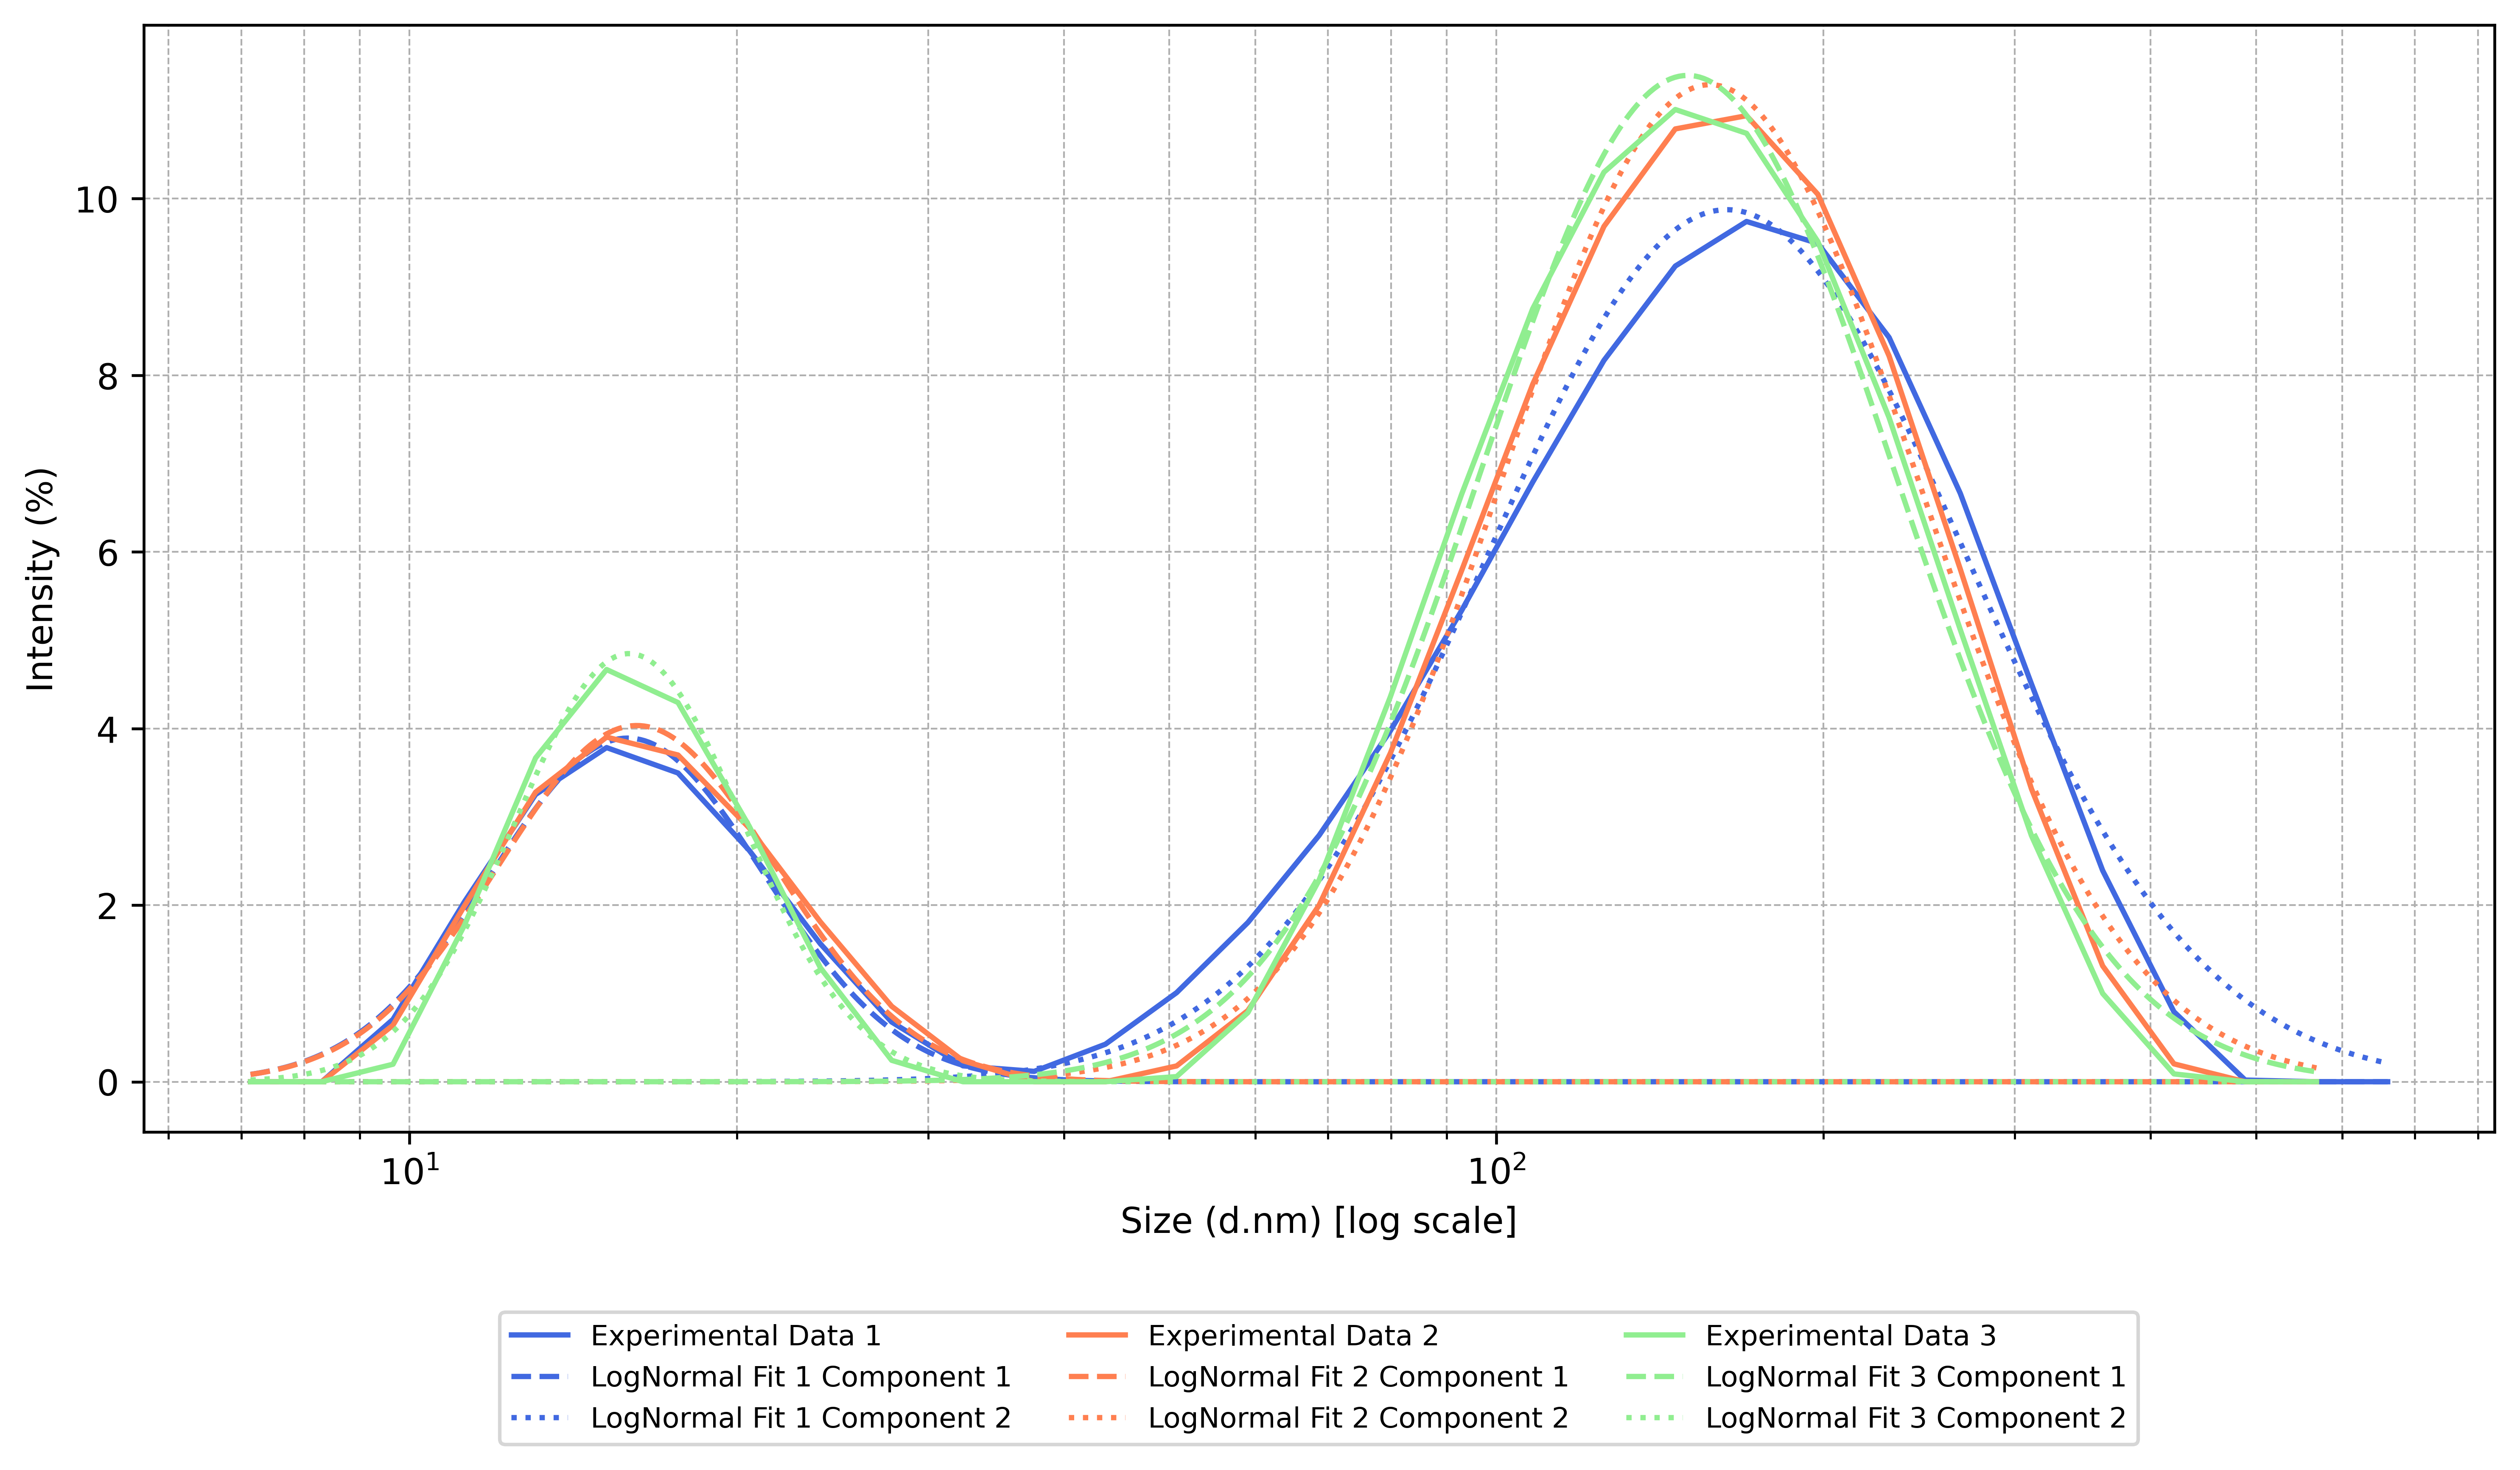


Fit Statistics Summary (Only % > 0.1 included):
Sample                      Mean1 (nm)    Std1 (nm)   Mean2 (nm)    Std2 (nm)         Chi²
-------------------------------------------------------------------------------------
Sample 1 Intensity.1             17.98         5.29       238.69       128.51         4.33
Sample 1 Intensity.2             18.41         5.52       209.98        96.87         2.14
Sample 1 Intensity.3            200.06        92.10        17.38         4.26         2.30


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

# Two-component Log-normal PDF mixture
def two_lognormal(x, A1, mu1, sigma1, A2, mu2, sigma2):
    return (A1 * (1 / (x * sigma1 * np.sqrt(2 * np.pi))) * 
            np.exp(-((np.log(x) - mu1)**2) / (2 * sigma1**2))) + \
           (A2 * (1 / (x * sigma2 * np.sqrt(2 * np.pi))) * 
            np.exp(-((np.log(x) - mu2)**2) / (2 * sigma2**2)))

file_path = '/Users/ludovica/Documents/Bachelor/BA6/Physical Chemistry/Challenge B /DLS/Sample 1.xlsx'
sheet_names = ["Sample 1 Intensity.1", "Sample 1 Intensity.2", "Sample 1 Intensity.3"]

data_colors = ['royalblue', 'coral', 'lightgreen']
data_labels = ["Experimental Data 1", "Experimental Data 2", "Experimental Data 3"]
fit_labels = ["LogNormal Fit 1", "LogNormal Fit 2", "LogNormal Fit 3"]

fig, ax = plt.subplots(figsize=(10, 6), dpi=600)
stats_data = []

for i, sheet in enumerate(sheet_names):
    df = pd.read_excel(file_path, sheet_name=sheet, dtype=str)
    df.columns = ['Size_nm', 'Percent']
    df['Size_nm'] = df['Size_nm'].str.replace(',', '.', regex=False)
    df['Percent'] = df['Percent'].str.replace(',', '.', regex=False)
    df['Size_nm'] = pd.to_numeric(df['Size_nm'], errors='coerce')
    df['Percent'] = pd.to_numeric(df['Percent'], errors='coerce')
    df = df.dropna()

    x = df['Size_nm'].values
    y = df['Percent'].values



    A1_init = max(y) * 0.6
    mu1_init = np.log(np.percentile(x, 20))
    sigma1_init = 0.3
    A2_init = max(y) * 0.4
    mu2_init = np.log(np.percentile(x, 75))
    sigma2_init = 0.3

    p0 = [A1_init, mu1_init, sigma1_init, A2_init, mu2_init, sigma2_init]

    try:
        popt, pcov = curve_fit(two_lognormal, x, y, p0=p0, maxfev=20000)
        A1, mu1, sigma1, A2, mu2, sigma2 = popt

        # Swap components for 3rd dataset (index 2)
        if i == 2:
            A1, A2 = A2, A1
            mu1, mu2 = mu2, mu1
            sigma1, sigma2 = sigma2, sigma1

        x_fit = np.logspace(np.log10(min(x)), np.log10(max(x)), 500)
        y_fit_1 = A1 * (1 / (x_fit * sigma1 * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x_fit) - mu1)**2) / (2 * sigma1**2))
        y_fit_2 = A2 * (1 / (x_fit * sigma2 * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x_fit) - mu2)**2) / (2 * sigma2**2))

        y_fit_total = two_lognormal(x, *popt)
        chi2 = np.sum((y - y_fit_total) ** 2)

        mean1 = np.exp(mu1 + (sigma1**2)/2)
        std1 = np.sqrt((np.exp(sigma1**2) - 1) * np.exp(2*mu1 + sigma1**2))
        mean2 = np.exp(mu2 + (sigma2**2)/2)
        std2 = np.sqrt((np.exp(sigma2**2) - 1) * np.exp(2*mu2 + sigma2**2))

        color = data_colors[i % len(data_colors)]

        # Experimental data (solid line)
        ax.plot(x, y, '-', label=data_labels[i], color=color)

        # First component (dashed line)
        ax.plot(x_fit, y_fit_1, '--', label=f"{fit_labels[i]} Component 1", color=color)

        # Second component (dotted line)
        ax.plot(x_fit, y_fit_2, ':', label=f"{fit_labels[i]} Component 2", color=color)

        stats_data.append([sheet, f"{mean1:.2f}", f"{std1:.2f}", f"{mean2:.2f}", f"{std2:.2f}", f"{chi2:.2f}"])

    except Exception as e:
        print(f"Fit failed for {sheet}: {e}")

ax.set_xscale('log')
ax.set_xlabel('Size (d.nm) [log scale]')
ax.set_ylabel('Intensity (%)')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Put legend below the plot, centered and outside
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=8)

plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # increase bottom margin to fit legend

save_path = os.path.join("/Users/ludovica/Documents/Bachelor/BA6/Physical Chemistry/Challenge B /DLS", "Intensity 1.png")
plt.savefig(save_path, format='png', bbox_inches='tight')
plt.show()

print("\nFit Statistics Summary (Only % > 0.1 included):")
print(f"{'Sample':<25} {'Mean1 (nm)':>12} {'Std1 (nm)':>12} {'Mean2 (nm)':>12} {'Std2 (nm)':>12} {'Chi²':>12}")
print("-" * 85)
for row in stats_data:
    print(f"{row[0]:<25} {row[1]:>12} {row[2]:>12} {row[3]:>12} {row[4]:>12} {row[5]:>12}")


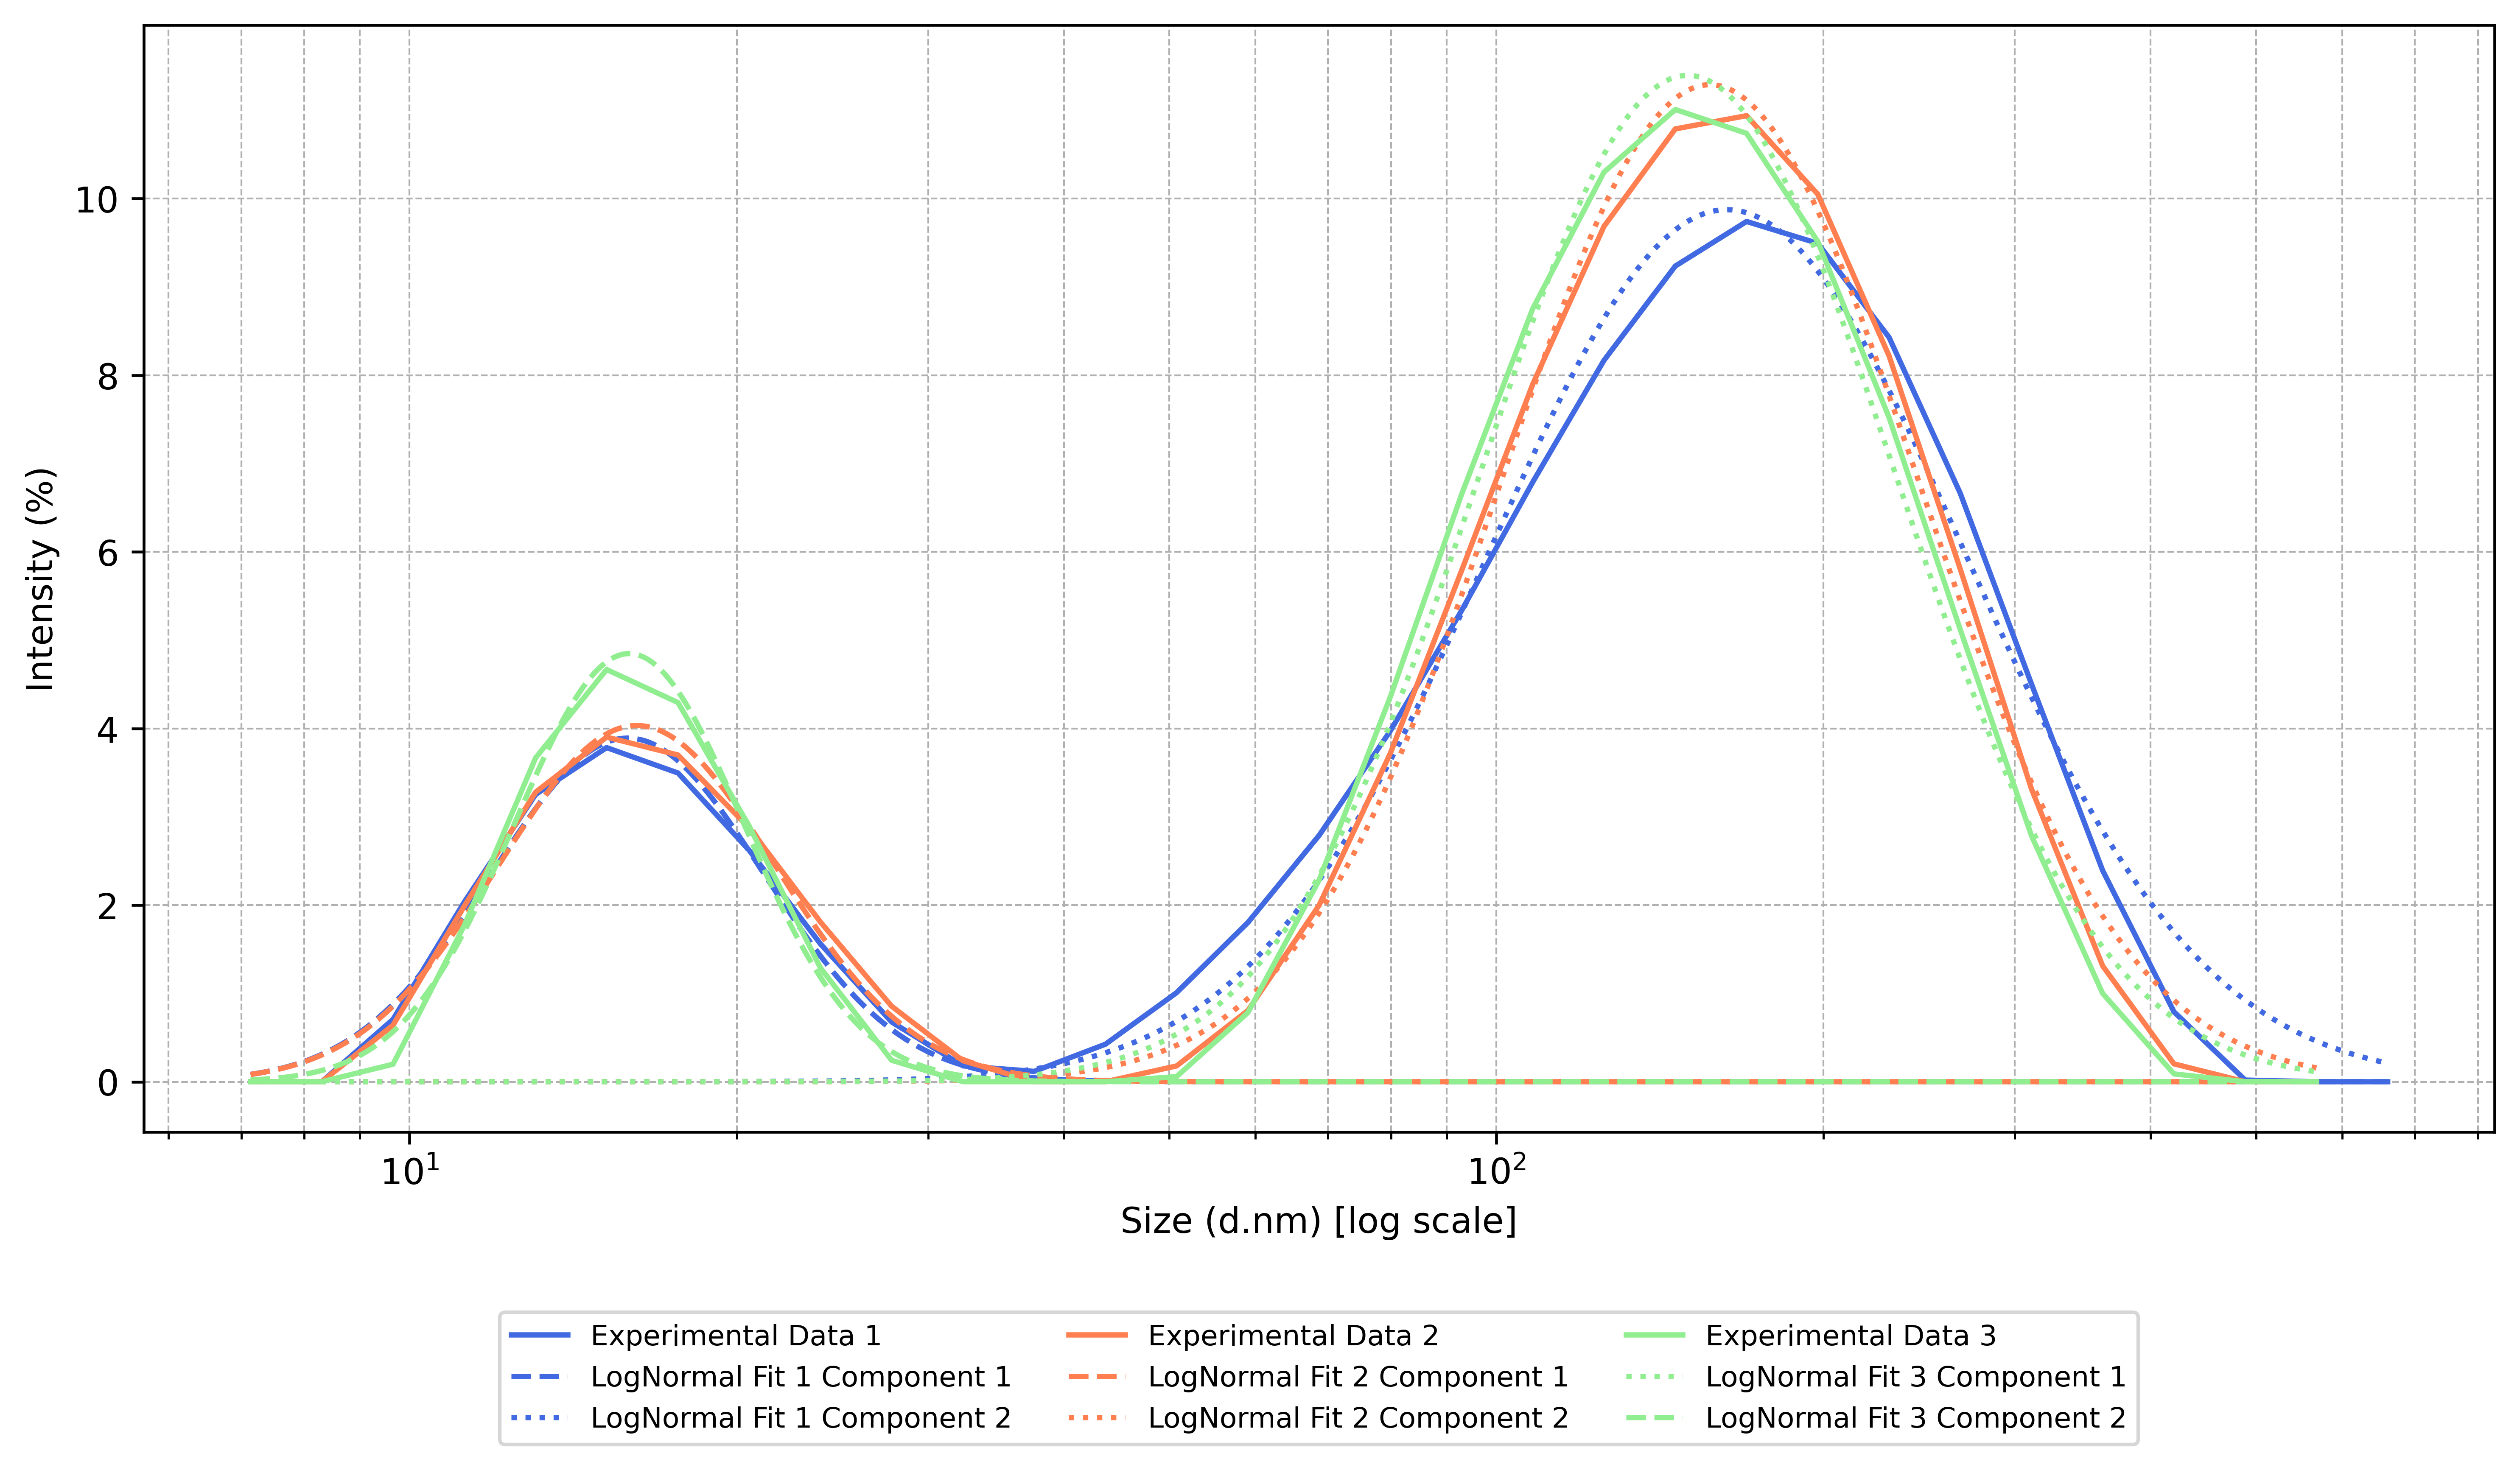


Fit Statistics Summary (Only % > 0.1 included):
Sample                      Mean1 (nm)    Std1 (nm)   Mean2 (nm)    Std2 (nm)         Chi²
-------------------------------------------------------------------------------------
Sample 1 Intensity.1             17.98         5.29       238.69       128.51         4.33
Sample 1 Intensity.2             18.41         5.52       209.98        96.87         2.14
Sample 1 Intensity.3            200.06        92.10        17.38         4.26         2.30


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

# Two-component Log-normal PDF mixture
def two_lognormal(x, A1, mu1, sigma1, A2, mu2, sigma2):
    return (A1 * (1 / (x * sigma1 * np.sqrt(2 * np.pi))) *
            np.exp(-((np.log(x) - mu1)**2) / (2 * sigma1**2))) + \
           (A2 * (1 / (x * sigma2 * np.sqrt(2 * np.pi))) *
            np.exp(-((np.log(x) - mu2)**2) / (2 * sigma2**2)))

file_path = '/Users/ludovica/Documents/Bachelor/BA6/Physical Chemistry/Challenge B /DLS/Sample 1.xlsx'
sheet_names = ["Sample 1 Intensity.1", "Sample 1 Intensity.2", "Sample 1 Intensity.3"]

data_colors = ['royalblue', 'coral', 'lightgreen']
data_labels = ["Experimental Data 1", "Experimental Data 2", "Experimental Data 3"]
fit_labels = ["LogNormal Fit 1", "LogNormal Fit 2", "LogNormal Fit 3"]

fig, ax = plt.subplots(figsize=(10, 6), dpi=600)
stats_data = []

for i, sheet in enumerate(sheet_names):
    df = pd.read_excel(file_path, sheet_name=sheet, dtype=str)
    df.columns = ['Size_nm', 'Percent']
    df['Size_nm'] = df['Size_nm'].str.replace(',', '.', regex=False)
    df['Percent'] = df['Percent'].str.replace(',', '.', regex=False)
    df['Size_nm'] = pd.to_numeric(df['Size_nm'], errors='coerce')
    df['Percent'] = pd.to_numeric(df['Percent'], errors='coerce')
    df = df.dropna()

    x = df['Size_nm'].values
    y = df['Percent'].values

    # Initial guess
    A1_init = max(y) * 0.6
    mu1_init = np.log(np.percentile(x, 20))
    sigma1_init = 0.3
    A2_init = max(y) * 0.4
    mu2_init = np.log(np.percentile(x, 80))
    sigma2_init = 0.3
    p0 = [A1_init, mu1_init, sigma1_init, A2_init, mu2_init, sigma2_init]

    try:
        popt, pcov = curve_fit(two_lognormal, x, y, p0=p0, maxfev=20000)
        A1, mu1, sigma1, A2, mu2, sigma2 = popt

        # Swap components for 3rd dataset (index 2)
        if i == 2:
            A1, A2 = A2, A1
            mu1, mu2 = mu2, mu1
            sigma1, sigma2 = sigma2, sigma1

        x_fit = np.logspace(np.log10(min(x)), np.log10(max(x)), 500)
        y_fit_1 = A1 * (1 / (x_fit * sigma1 * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x_fit) - mu1)**2) / (2 * sigma1**2))
        y_fit_2 = A2 * (1 / (x_fit * sigma2 * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x_fit) - mu2)**2) / (2 * sigma2**2))

        y_fit_total = two_lognormal(x, *popt)
        chi2 = np.sum((y - y_fit_total) ** 2)

        mean1 = np.exp(mu1 + (sigma1**2)/2)
        std1 = np.sqrt((np.exp(sigma1**2) - 1) * np.exp(2*mu1 + sigma1**2))
        mean2 = np.exp(mu2 + (sigma2**2)/2)
        std2 = np.sqrt((np.exp(sigma2**2) - 1) * np.exp(2*mu2 + sigma2**2))

        color = data_colors[i % len(data_colors)]

        # Plot experimental data
        ax.plot(x, y, '-', label=data_labels[i], color=color)

        # Swap line styles for dataset 3
        if i == 2:
            ax.plot(x_fit, y_fit_1, ':', label=f"{fit_labels[i]} Component 1", color=color)
            ax.plot(x_fit, y_fit_2, '--', label=f"{fit_labels[i]} Component 2", color=color)
        else:
            ax.plot(x_fit, y_fit_1, '--', label=f"{fit_labels[i]} Component 1", color=color)
            ax.plot(x_fit, y_fit_2, ':', label=f"{fit_labels[i]} Component 2", color=color)

        stats_data.append([sheet, f"{mean1:.2f}", f"{std1:.2f}", f"{mean2:.2f}", f"{std2:.2f}", f"{chi2:.2f}"])

    except Exception as e:
        print(f"Fit failed for {sheet}: {e}")

# Plot settings
ax.set_xscale('log')
ax.set_xlabel('Size (d.nm) [log scale]')
ax.set_ylabel('Intensity (%)')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=8)

# Layout adjustments
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)

# Save figure
save_path = os.path.join("/Users/ludovica/Documents/Bachelor/BA6/Physical Chemistry/Challenge B /DLS", "Intensity 1.png")
plt.savefig(save_path, format='png', bbox_inches='tight')
plt.show()

# Output statistics
print("\nFit Statistics Summary (Only % > 0.1 included):")
print(f"{'Sample':<25} {'Mean1 (nm)':>12} {'Std1 (nm)':>12} {'Mean2 (nm)':>12} {'Std2 (nm)':>12} {'Chi²':>12}")
print("-" * 85)
for row in stats_data:
    print(f"{row[0]:<25} {row[1]:>12} {row[2]:>12} {row[3]:>12} {row[4]:>12} {row[5]:>12}")
